# Simpson’s Paradox: When Aggregation Reverses Reality

## 1. Conceptual Overview

Simpson’s Paradox xảy ra khi:

- Trong từng nhóm riêng lẻ: X và Y có tương quan cùng chiều.
- Khi gộp toàn bộ dữ liệu: mối quan hệ có thể đảo chiều.

Hiện tượng này không phải là nghịch lý toán học, mà là hệ quả cấu trúc của việc gộp dữ liệu khi tồn tại biến phân nhóm (confounding variable).

Mục tiêu của notebook này:

1. Tạo dữ liệu có cấu trúc gây ra hiện tượng đảo chiều.
2. Quan sát trực quan.
3. So sánh tương quan theo nhóm và tổng thể.
4. Phân tích cơ chế cấu trúc.

## 2. Import

In [9]:
import pandas as pd
import seaborn as sns

from src import (
    generate_simpsons_data,
    compute_correlation,
    compute_groupwise_correlation,
    compute_linear_regression_slope,
    plot_simpsons_scatter,
    plot_simpsons_regression,
)

sns.set_theme(style="whitegrid")
pd.set_option("display.precision", 4)

## 3. Generate Data

Ta sinh dữ liệu gồm hai nhóm:

- Trong từng nhóm: Y phụ thuộc tuyến tính vào X (slope dương).
- Hai nhóm có baseline khác nhau.

Cấu trúc này có thể tạo ra đảo chiều khi gộp.

In [2]:
df = generate_simpsons_data(
    n_per_group=500,
    beta=1.0,
    group_shift=5.0,
    seed=42
)

df.head()

,group,X,Y
0,A,0.3047,1.6686
1,A,-1.0400,-0.1448
2,A,0.7505,0.0310
3,A,0.9406,-0.5619
4,A,-1.9510,-4.9156


In [3]:
df["group"].value_counts()

group
A    500
B    500
Name: count, dtype: int64

In [4]:
df.groupby("group")[["X","Y"]].mean()

,X,Y
group,,
A,-0.0131,-0.0578
B,4.9961,-5.1628


## Group-Level Distribution Analysis

### So sánh trung bình giữa hai nhóm

Từ kết quả tính toán:

- Group A:
  - Mean X ≈ -0.013
  - Mean Y ≈ -0.058

- Group B:
  - Mean X ≈ 4.996
  - Mean Y ≈ -5.163

Nhận xét:

- Mean X giữa hai nhóm chênh lệch rất lớn (≈ 5 đơn vị).
- Đồng thời, Mean Y của Group B thấp hơn Group A một cách đáng kể (≈ -5 đơn vị).

Điều này cho thấy:

> Hai nhóm không chỉ khác biệt theo X,
> mà còn có sự dịch chuyển baseline của Y theo hướng ngược lại.

Cụ thể:
- Nhóm có X cao hơn (Group B) lại có Y trung bình thấp hơn.
- Nhóm có X thấp hơn (Group A) lại có Y trung bình cao hơn.

---

### Hàm ý cấu trúc

Cấu trúc hiện tại tạo ra một điều kiện quan trọng:


$$
(\mu_{X,B} - \mu_{X,A}) > 0
$$

$$
(\mu_{Y,B} - \mu_{Y,A}) < 0
$$

Tức là sự khác biệt giữa các nhóm mang dấu ngược nhau.

Điều này có nghĩa:

- Thành phần biến thiên giữa nhóm (between-group variation)
  sẽ tạo ra covariance âm ở cấp độ tổng thể.
- Trong khi đó, biến thiên nội bộ từng nhóm vẫn có thể dương.

Chính cấu trúc này là điều kiện cần để Simpson’s Paradox xuất hiện.

---

Ở giai đoạn này, ta mới chỉ phân tích trung bình và phân bố.
Phần tiếp theo sẽ kiểm tra xem cấu trúc này có thực sự dẫn đến đảo chiều trong tương quan tổng thể hay không.

## 4. Visual Inspection

Quan sát scatter plot theo nhóm.

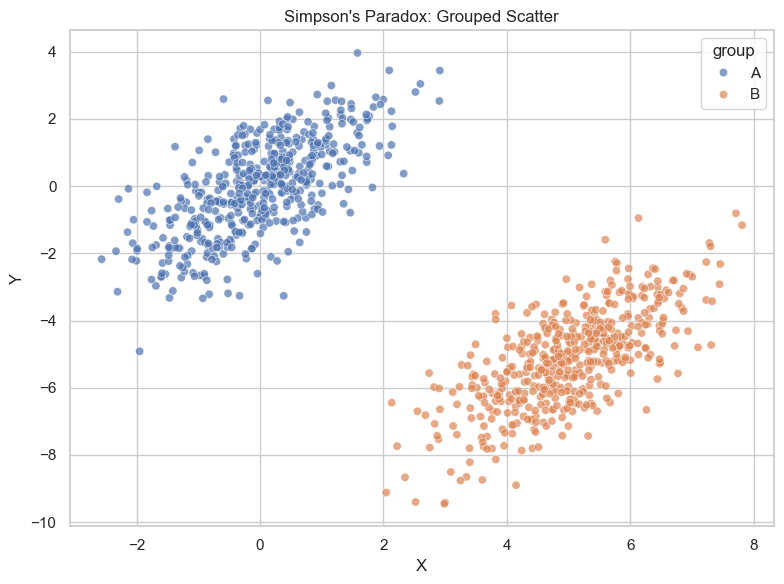

In [5]:
plot_simpsons_scatter(df, x="X", y="Y", group_col="group")

Quan sát biểu đồ phân tán:

- Hai cụm (Group A và Group B) tách biệt rõ ràng.
- Group A nằm phía trên bên trái.
- Group B nằm phía dưới bên phải.

Trong từng nhóm riêng lẻ:

- Các điểm nghiêng lên theo chiều dương.
- Điều này cho thấy trong từng nhóm: X tăng thì Y tăng.

Tức là quan hệ nội bộ của mỗi nhóm là **dương**.

Tiếp theo, ta vẽ regression lines cho từng nhóm và tổng thể.

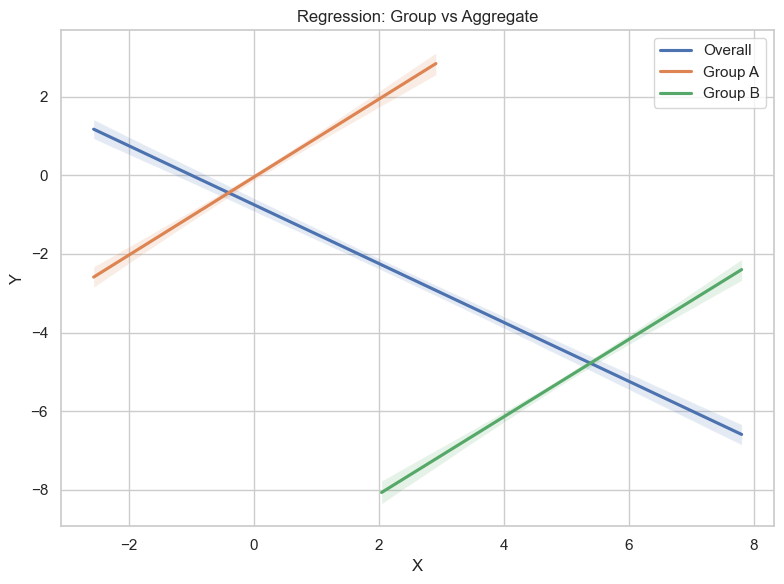

In [6]:
plot_simpsons_regression(df, x="X", y="Y", group_col="group")

Biểu đồ hồi quy cho thấy:

- Đường của Group A: dốc lên (slope dương).
- Đường của Group B: dốc lên (slope dương).
- Đường tổng thể (Overall): dốc xuống (slope âm).

Điều này xác nhận:

> Trong từng nhóm: quan hệ dương
> Khi gộp toàn bộ dữ liệu: quan hệ âm

Đây chính là Simpson’s Paradox.

---

### Trực giác hình học

Vì:

- Nhóm có X trung bình cao hơn (Group B)
- Lại có Y trung bình thấp hơn đáng kể

Khi gộp dữ liệu:

- Sự khác biệt giữa hai cụm tạo ra một xu hướng tổng thể đi xuống.
- Thành phần biến thiên giữa nhóm (between-group variation)
  lấn át biến thiên nội bộ (within-group variation).

Do đó, covariance tổng thể mang dấu âm,
mặc dù covariance trong từng nhóm là dương.

---

### Ý nghĩa cấu trúc

Hiện tượng này cho thấy:

- Correlation không invariant dưới aggregation.
- Bỏ qua biến phân nhóm có thể đảo ngược kết luận.
- Phân tích tổng thể có thể che khuất cấu trúc nội bộ.

Simpson’s Paradox không phải là lỗi thống kê,
mà là hệ quả tất yếu của cấu trúc sinh dữ liệu.

## 5. Correlation Analysis

Ta tính:

- Corr(X, Y) tổng thể
- Corr(X, Y) theo từng nhóm

In [7]:
overall_corr = compute_correlation(df, "X", "Y")
group_corr = compute_groupwise_correlation(df, "group", "X", "Y")

overall_corr, group_corr

(-0.6914634663768692, {'A': 0.682533551243778, 'B': 0.707610891887388})

Kết quả tính toán:

- Corr(X, Y) tổng thể ≈ -0.692
- Corr(X, Y | Group A) ≈ 0.683
- Corr(X, Y | Group B) ≈ 0.708

Nhận xét:

- Trong từng nhóm riêng lẻ, tương quan là dương và khá mạnh.
- Khi gộp toàn bộ dữ liệu, tương quan trở thành âm và có độ lớn đáng kể.

Điều này xác nhận rõ ràng hiện tượng:

> Quan hệ nội bộ dương
> Quan hệ tổng thể âm

In [8]:
overall_slope = compute_linear_regression_slope(df, "X", "Y")

group_slopes = {
    g: compute_linear_regression_slope(subdf, "X", "Y")
    for g, subdf in df.groupby("group")
}

overall_slope, group_slopes

(-0.7480314256359593, {'A': 0.9907028300446539, 'B': 0.9831171101638388})

Hệ số hồi quy tuyến tính:

- Slope tổng thể ≈ -0.748
- Slope Group A ≈ 0.991
- Slope Group B ≈ 0.983

Nhận xét:

- Trong từng nhóm, slope xấp xỉ 1 (đúng với cấu trúc sinh dữ liệu).
- Khi gộp dữ liệu, slope đảo dấu và trở thành âm mạnh.

Điều này cho thấy:

- Đảo chiều không chỉ xảy ra ở mức correlation,
- Mà còn xảy ra ở mức quan hệ tuyến tính (OLS).

---

### Phân tích cấu trúc

Tổng covariance có thể được phân rã thành:

$Cov_{total} = Cov_{within} + Cov_{between}$

Trong trường hợp này:

- $Cov_{within}$ > 0  (trong từng nhóm)
- $Cov_{between}$ < 0 và có độ lớn lớn hơn Cov_within

Do đó:

$Cov_{total}$ < 0

Chính thành phần biến thiên giữa nhóm (between-group variation)
đã lấn át biến thiên nội bộ.

---

### Kết luận

Simpson’s Paradox đã xảy ra hoàn chỉnh:

- Nội bộ nhóm: X và Y cùng chiều.
- Tổng thể: X và Y ngược chiều.

Điều này minh họa một nguyên lý quan trọng:

> Statistical association phụ thuộc vào cấp độ phân tích.

Aggregation không phải là thao tác trung lập.
Nó có thể thay đổi bản chất của mối quan hệ thống kê.

## 7. Structural Interpretation

Nếu kết quả cho thấy:

- Slope trong từng nhóm dương
- Slope tổng thể âm (hoặc ngược chiều)

Thì điều đó chứng minh Simpson’s Paradox đã xảy ra.

Giải thích cấu trúc:

Tổng covariance có thể phân rã thành:

$Cov_{total} = Cov_{within} + Cov_{between}$

Phần Cov_between (khác biệt giữa nhóm) có thể đủ lớn để đảo dấu của quan hệ tổng thể.

Điều này nhấn mạnh rằng:

- Tương quan không invariant dưới phép gộp nhóm.
- Bỏ qua biến phân nhóm có thể dẫn đến kết luận sai.

## 8. Why This Matters

Simpson’s Paradox xuất hiện trong:

- Nghiên cứu y học (hiệu quả điều trị theo độ tuổi)
- Chính sách công
- Phân tích kinh tế
- Machine learning khi bỏ sót feature quan trọng

Nó cho thấy:

> Thống kê có thể đúng về mặt tính toán,
> nhưng sai về mặt cấu trúc nếu bỏ qua biến gây nhiễu.

## 9. Key Takeaways

- Aggregation có thể đảo chiều quan hệ.
- Correlation không phản ánh cấu trúc nhân quả.
- Confounding variable có thể chi phối kết luận.
- Hiểu data-generating process quan trọng hơn việc tính toán đơn thuần.

Simpson’s Paradox là ví dụ đầu tiên cho thấy:
Statistical reasoning phải luôn gắn với cấu trúc sinh dữ liệu.